# Suppression electrode FWHM comparison


## Particle positions at surface of target


- current chamber
- microwave extraction aperture (1 mm diameter)
- surface mesh
- 5000 particles

- COMSOL files 06.suppr_electrode

- last accessed: 2019-02-14

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib import pyplot, transforms

pd.set_option("display.max_columns", 300)

### Specify path to datafile

In [27]:
file_FWHMs = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/06.suppr_electrode/particleData/plots/2D_histograms_lastTimestep/df_FWHMs.csv'
fig_save_path = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/06.suppr_electrode/particleData/plots/2D_histograms_lastTimestep/'

### Table that relates ID and paramters

In [45]:
params = {'ID': ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027'], 
          'inner_diam': [45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50, 45, 48, 50],
          'thcknss': [3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
         'hole_diam': [5, 5, 5, 7.5, 7.5, 7.5, 10, 10, 10, 5, 5, 5, 7.5, 7.5, 7.5, 10, 10, 10, 5, 5, 5, 7.5, 7.5, 7.5, 10, 10, 10]}

df_params = pd.DataFrame(params).set_index('ID')


print(df_params)
print(df_params.info())

     inner_diam  thcknss  hole_diam
ID                                 
001          45      3.0        5.0
002          48      3.0        5.0
003          50      3.0        5.0
004          45      3.0        7.5
005          48      3.0        7.5
006          50      3.0        7.5
007          45      3.0       10.0
008          48      3.0       10.0
009          50      3.0       10.0
010          45      5.0        5.0
011          48      5.0        5.0
012          50      5.0        5.0
013          45      5.0        7.5
014          48      5.0        7.5
015          50      5.0        7.5
016          45      5.0       10.0
017          48      5.0       10.0
018          50      5.0       10.0
019          45      1.5        5.0
020          48      1.5        5.0
021          50      1.5        5.0
022          45      1.5        7.5
023          48      1.5        7.5
024          50      1.5        7.5
025          45      1.5       10.0
026          48      1.5    

### Import and process the FWHMS

In [46]:
df = pd.read_csv(file_FWHMs, index_col=0)
df = df.drop(['id'], axis='columns')

df['ID'] = df['runfile'].str.extract(r'\.(\d\d\d)\.particleData')
df.set_index('ID', inplace=True)

df['FWHM_y'] = np.abs(df['FWHM_y'])
df['FWHM_x'] = np.abs(df['FWHM_x'])
df = df.sort_index()

df = pd.merge(df, df_params, left_index=True, right_index=True)

print(df.head())
print(df.tail())
print(df.info())

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
001  1.468048  1.181701  1.324874     1.286874          2.0   
002  1.417790  1.134076  1.275933     1.212376          2.0   
003  1.384205  1.096635  1.240420     1.231095          2.0   
004  1.466737  1.185540  1.326139     1.280063          2.0   
005  1.416460  1.132112  1.274286     1.172958          2.0   

                                     runfile run_type  inner_diam  thcknss  \
ID                                                                           
001  06.suppr_electrode.001.particleData.csv       TD          45      3.0   
002  06.suppr_electrode.002.particleData.csv       TD          48      3.0   
003  06.suppr_electrode.003.particleData.csv       TD          50      3.0   
004  06.suppr_electrode.004.particleData.csv       TD          45      3.0   
005  06.suppr_electrode.005.particleData.csv       TD          48      3.0   

     hole_d

### Plot: FWHM vs COMSOL run number

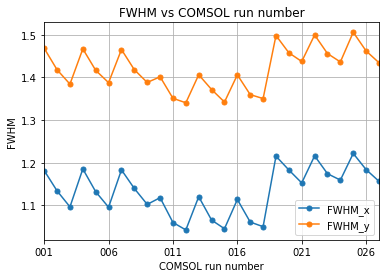

In [29]:
_ = df.plot(kind='line', style='.-', y=['FWHM_x', 'FWHM_y'], ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM')
_ = plt.title('FWHM vs COMSOL run number')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHM'

plt.savefig(filename + '.png', dpi=600)
plt.show()

### Plot: FWHM vs inner diameter

In [70]:
df_inner_diam = df[['FWHM_y', 'FWHM_x', 'inner_diam']].reset_index()
df_inner_diam = df_inner_diam.pivot(index='ID', columns='inner_diam', values=['FWHM_x', 'FWHM_y'])
df_inner_diam

FWHM_x                        FWHM_y                    
inner_diam        45        48        50        45        48        50
ID                                                                    
001         1.181701       NaN       NaN  1.468048       NaN       NaN
002              NaN  1.134076       NaN       NaN  1.417790       NaN
003              NaN       NaN  1.096635       NaN       NaN  1.384205
004         1.185540       NaN       NaN  1.466737       NaN       NaN
005              NaN  1.132112       NaN       NaN  1.416460       NaN
006              NaN       NaN  1.095785       NaN       NaN  1.387584
007         1.183292       NaN       NaN  1.465208       NaN       NaN
008              NaN  1.139721       NaN       NaN  1.417880       NaN
009              NaN       NaN  1.102445       NaN       NaN  1.388081
010         1.118178       NaN       NaN  1.401331       NaN       NaN
011              NaN  1.060017       NaN       NaN  1.350913       NaN
012              NaN       NaN  1.042658       NaN       NaN  1.340445
013         1.120482       NaN       NaN  1.406103       NaN       NaN
014              NaN  1.065636       NaN       NaN  1.371531       NaN
015              NaN       NaN  1.045485       NaN       NaN  1.342182
016         1.113936       NaN       NaN  1.405936       NaN       NaN
017              NaN  1.061056       NaN       NaN  1.359559       NaN
018              NaN       NaN  1.050271       NaN       NaN  1.350374
019         1.215432       NaN       NaN  1.498048       NaN       NaN
020              NaN  1.183076       NaN       NaN  1.457591       NaN
021              NaN       NaN  1.152743       NaN       NaN  1.437187
022         1.216088       NaN       NaN  1.499317       NaN       NaN
023              NaN  1.174315       NaN       NaN  1.455735       NaN
024              NaN       NaN  1.159398       NaN       NaN  1.436165
025         1.221730       NaN       NaN  1.505698       NaN       NaN
026              NaN  1.183950       NaN       NaN  1.461831       NaN
027              NaN       NaN  1.156560       NaN       NaN  1.434316

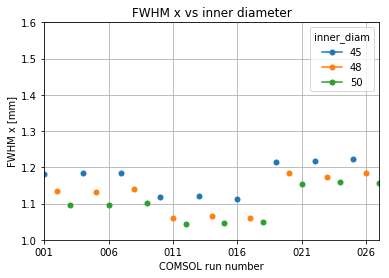

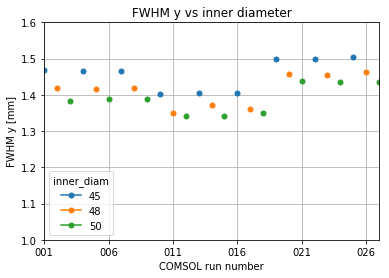

In [88]:
_ = df_inner_diam.plot(kind='line', style='.-', y='FWHM_x', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM x [mm]')
_ = plt.title('FWHM x vs inner diameter')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMx_inner_diameter'

plt.savefig(filename + '.png', dpi=600)
plt.show()

_ = df_inner_diam.plot(kind='line', style='.-', y='FWHM_y', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM y [mm]')
_ = plt.title('FWHM y vs inner diameter')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMy_inner_diameter'

plt.savefig(filename + '.png', dpi=600)
plt.show()

### Plot: FWHM vs thickness

In [90]:
df_thickness = df[['FWHM_y', 'FWHM_x', 'thcknss']].reset_index()
df_thickness = df_thickness.pivot(index='ID', columns='thcknss', values=['FWHM_x', 'FWHM_y'])
df_thickness

FWHM_x                        FWHM_y                    
thcknss       1.5       3.0       5.0       1.5       3.0       5.0
ID                                                                 
001           NaN  1.181701       NaN       NaN  1.468048       NaN
002           NaN  1.134076       NaN       NaN  1.417790       NaN
003           NaN  1.096635       NaN       NaN  1.384205       NaN
004           NaN  1.185540       NaN       NaN  1.466737       NaN
005           NaN  1.132112       NaN       NaN  1.416460       NaN
006           NaN  1.095785       NaN       NaN  1.387584       NaN
007           NaN  1.183292       NaN       NaN  1.465208       NaN
008           NaN  1.139721       NaN       NaN  1.417880       NaN
009           NaN  1.102445       NaN       NaN  1.388081       NaN
010           NaN       NaN  1.118178       NaN       NaN  1.401331
011           NaN       NaN  1.060017       NaN       NaN  1.350913
012           NaN       NaN  1.042658       NaN       NaN  1.340445
013           NaN       NaN  1.120482       NaN       NaN  1.406103
014           NaN       NaN  1.065636       NaN       NaN  1.371531
015           NaN       NaN  1.045485       NaN       NaN  1.342182
016           NaN       NaN  1.113936       NaN       NaN  1.405936
017           NaN       NaN  1.061056       NaN       NaN  1.359559
018           NaN       NaN  1.050271       NaN       NaN  1.350374
019      1.215432       NaN       NaN  1.498048       NaN       NaN
020      1.183076       NaN       NaN  1.457591       NaN       NaN
021      1.152743       NaN       NaN  1.437187       NaN       NaN
022      1.216088       NaN       NaN  1.499317       NaN       NaN
023      1.174315       NaN       NaN  1.455735       NaN       NaN
024      1.159398       NaN       NaN  1.436165       NaN       NaN
025      1.221730       NaN       NaN  1.505698       NaN       NaN
026      1.183950       NaN       NaN  1.461831       NaN       NaN
027      1.156560       NaN       NaN  1.434316       NaN       NaN

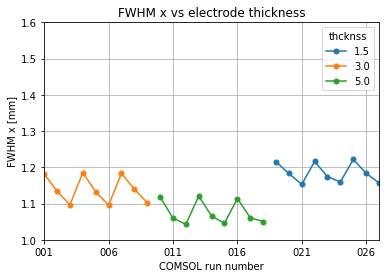

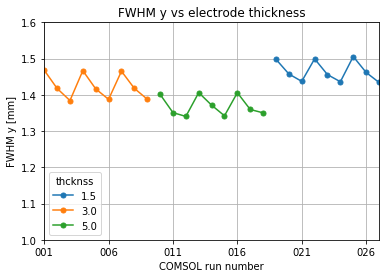

In [93]:
_ = df_thickness.plot(kind='line', style='.-', y='FWHM_x', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM x [mm]')
_ = plt.title('FWHM x vs electrode thickness')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMx_thcknss'

plt.savefig(filename + '.png', dpi=600)
plt.show()

_ = df_thickness.plot(kind='line', style='.-', y='FWHM_y', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM y [mm]')
_ = plt.title('FWHM y vs electrode thickness')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMy_thcknss'

plt.savefig(filename + '.png', dpi=600)
plt.show()

### Plot: FWHM vs hole diameter

In [94]:
df_hole_diam = df[['FWHM_y', 'FWHM_x', 'hole_diam']].reset_index()
df_hole_diam = df_hole_diam.pivot(index='ID', columns='hole_diam', values=['FWHM_x', 'FWHM_y'])
df_hole_diam

FWHM_x                        FWHM_y                    
hole_diam      5.0       7.5       10.0      5.0       7.5       10.0
ID                                                                   
001        1.181701       NaN       NaN  1.468048       NaN       NaN
002        1.134076       NaN       NaN  1.417790       NaN       NaN
003        1.096635       NaN       NaN  1.384205       NaN       NaN
004             NaN  1.185540       NaN       NaN  1.466737       NaN
005             NaN  1.132112       NaN       NaN  1.416460       NaN
006             NaN  1.095785       NaN       NaN  1.387584       NaN
007             NaN       NaN  1.183292       NaN       NaN  1.465208
008             NaN       NaN  1.139721       NaN       NaN  1.417880
009             NaN       NaN  1.102445       NaN       NaN  1.388081
010        1.118178       NaN       NaN  1.401331       NaN       NaN
011        1.060017       NaN       NaN  1.350913       NaN       NaN
012        1.042658       NaN       NaN  1.340445       NaN       NaN
013             NaN  1.120482       NaN       NaN  1.406103       NaN
014             NaN  1.065636       NaN       NaN  1.371531       NaN
015             NaN  1.045485       NaN       NaN  1.342182       NaN
016             NaN       NaN  1.113936       NaN       NaN  1.405936
017             NaN       NaN  1.061056       NaN       NaN  1.359559
018             NaN       NaN  1.050271       NaN       NaN  1.350374
019        1.215432       NaN       NaN  1.498048       NaN       NaN
020        1.183076       NaN       NaN  1.457591       NaN       NaN
021        1.152743       NaN       NaN  1.437187       NaN       NaN
022             NaN  1.216088       NaN       NaN  1.499317       NaN
023             NaN  1.174315       NaN       NaN  1.455735       NaN
024             NaN  1.159398       NaN       NaN  1.436165       NaN
025             NaN       NaN  1.221730       NaN       NaN  1.505698
026             NaN       NaN  1.183950       NaN       NaN  1.461831
027             NaN       NaN  1.156560       NaN       NaN  1.434316

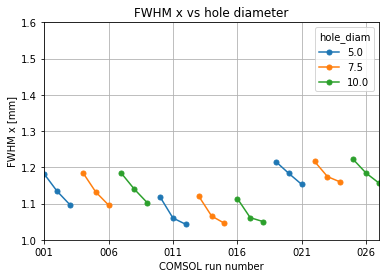

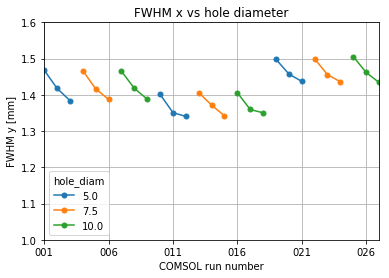

In [95]:
_ = df_hole_diam.plot(kind='line', style='.-', y='FWHM_x', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM x [mm]')
_ = plt.title('FWHM x vs hole diameter')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMx_hole_diam'

plt.savefig(filename + '.png', dpi=600)
plt.show()

_ = df_hole_diam.plot(kind='line', style='.-', y='FWHM_y', ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.ylim(1.0, 1.6)
_ = plt.grid()
_ = plt.xlabel('COMSOL run number')
_ = plt.ylabel('FWHM y [mm]')
_ = plt.title('FWHM x vs hole diameter')


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHMy_hole_diam'

plt.savefig(filename + '.png', dpi=600)
plt.show()